## Dataset Features:
* Daily Time Spent on Site: Consumer's time on the site in minutes.
* Age: Age of the consumer in years.
* Area Income: Average income of the geographical area of the consumer.
* Daily Internet Usage: Average minutes per day the consumer is on the internet.
* Ad Topic Line: Headline of the advertisement.
* City: City of the consumer.
* Male: Binary indicator of whether the consumer is male (1 for male, 0 for female).
* Country: Country of the consumer.
* Timestamp: Time at which the consumer clicked on the ad or closed the window.
* Clicked on Ad: Binary label (0 or 1) indicating whether the consumer clicked on the advertisement.

## Project Tasks:

Data Analysis and Preprocessing: Explore and preprocess the dataset, handling missing values, encoding categorical features, and scaling numerical features.
Exploratory Data Analysis (EDA): Gain insights into the relationships between different features, identify patterns, and understand the distribution of the target variable.
Feature Engineering: Extract relevant features and create new ones that might enhance the predictive performance of the model.
Model Development: Build a machine learning model to predict whether a user will click on an ad. Evaluate the model's performance using appropriate metrics and fine-tune if necessary.
Deployment: Deploy the trained model, making it accessible for predictions in a real-world scenario. Choose an appropriate deployment platform and ensure that it integrates seamlessly.
Monitoring and Maintenance: Implement monitoring mechanisms to keep track of the model's performance over time. Regularly update the model as needed to maintain its effectiveness.

In [110]:
#
# conda  


In [111]:
# %pip install -r "requirements.txt"



In [112]:
import numpy as np
import pandas as pd


In [113]:
data_df  = pd.read_csv(filepath_or_buffer="./Artifacts/advertising.csv")

In [114]:
data_df.head()



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [115]:
data_df.shape

(1000, 10)

In [116]:
data_df.isna().count()


Daily Time Spent on Site    1000
Age                         1000
Area Income                 1000
Daily Internet Usage        1000
Ad Topic Line               1000
City                        1000
Male                        1000
Country                     1000
Timestamp                   1000
Clicked on Ad               1000
dtype: int64

In [117]:
data_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [118]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [119]:
data_df.describe() # Learn

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [120]:
print(data_df["Ad Topic Line"].head(15))

0                Cloned 5thgeneration orchestration
1                Monitored national standardization
2                  Organic bottom-line service-desk
3             Triple-buffered reciprocal time-frame
4                     Robust logistical utilization
5                   Sharable client-driven software
6                        Enhanced dedicated support
7                          Reactive local challenge
8                    Configurable coherent function
9                Mandatory homogeneous architecture
10                   Centralized neutral neural-net
11    Team-oriented grid-enabled Local Area Network
12            Centralized content-based focus group
13                 Synergistic fresh-thinking array
14                    Grass-roots coherent extranet
Name: Ad Topic Line, dtype: object


In [121]:
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
tfidf_vectorizer = TfidfVectorizer()

In [123]:
# %pip install spacy

In [124]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import spacy
import string

In [125]:
import gensim.downloader as api

In [126]:
wv = api.load('glove-twitter-50')

In [127]:
def sent_vec(sent):
    vector_size = wv.vector_size
    print(vector_size)
    wv_res = np.zeros(vector_size)
    print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
            # print(wv_res)
    wv_res = wv_res/ctr
    # print(wv_res)
    return wv_res

In [128]:

data_df['vec'] = data_df['Ad Topic Line'].apply(sent_vec)


50
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
50
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
50
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
50
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
50
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
50
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
50
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [129]:
from sklearn.metrics.pairwise import cosine_similarity


In [130]:
data_df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,vec
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,"[0.3507523862344603, -0.0736780729024641, 0.19..."
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,"[0.2393833115347661, 0.07099092891439795, 0.18..."
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,"[0.2597013333191474, -0.0138705063611269, 0.14..."
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,"[0.20950848864657537, 0.0865897114787783, 0.24..."
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,"[0.21028796438541678, 0.17830036911699507, -0...."


In [131]:
data_df.shape

(1000, 11)

In [132]:
data_df['City'].nunique()

969

In [133]:
data_df['Time'] = pd.to_datetime(data_df['Timestamp'])

In [134]:
data_df.drop(columns=['City','Country','Timestamp','Time'],inplace=True)


In [135]:
data_df = data_df.drop(columns='Ad Topic Line')

In [136]:
data_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,vec
0,68.95,35,61833.90,256.09,0,0,"[0.3507523862344603, -0.0736780729024641, 0.19..."
1,80.23,31,68441.85,193.77,1,0,"[0.2393833115347661, 0.07099092891439795, 0.18..."
2,69.47,26,59785.94,236.50,0,0,"[0.2597013333191474, -0.0138705063611269, 0.14..."
3,74.15,29,54806.18,245.89,1,0,"[0.20950848864657537, 0.0865897114787783, 0.24..."
4,68.37,35,73889.99,225.58,0,0,"[0.21028796438541678, 0.17830036911699507, -0...."


In [137]:
data_df['Ad Topic Line'] = data_df['vec'].apply(lambda x: np.linalg.norm(x))


In [138]:
data_df.head()
data_df.drop(columns=['vec'],inplace=True)

<bound method DataFrame.corr of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                       68.95   35     61833.90                256.09     0   
1                       80.23   31     68441.85                193.77     1   
2                       69.47   26     59785.94                236.50     0   
3                       74.15   29     54806.18                245.89     1   
4                       68.37   35     73889.99                225.58     0   
..                        ...  ...          ...                   ...   ...   
995                     72.97   30     71384.57                208.58     1   
996                     51.30   45     67782.17                134.42     1   
997                     51.63   51     42415.72                120.37     1   
998                     55.55   19     41920.79                187.95     0   
999                     45.01   26     29875.80                178.35     0   

     Clicked on Ad 

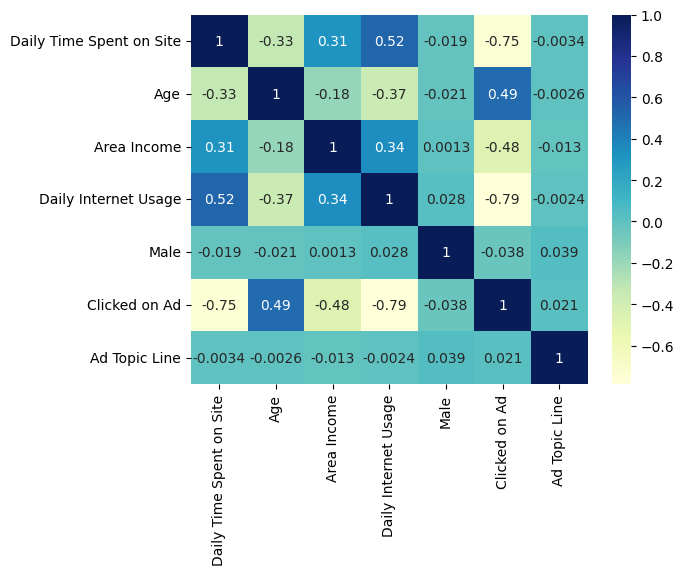

In [139]:
import seaborn as sns
print(data_df.corr)
dataplt = sns.heatmap(data_df.corr(),cmap='YlGnBu',annot=True)

In [140]:
target_col = data_df.pop('Clicked on Ad')
data_df['Clicked on Ad']=target_col

In [141]:
data_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Ad Topic Line,Clicked on Ad
0,68.95,35,61833.90,256.09,0,5.007369,0
1,80.23,31,68441.85,193.77,1,5.012398,0
2,69.47,26,59785.94,236.50,0,4.946409,0
3,74.15,29,54806.18,245.89,1,5.149616,0
4,68.37,35,73889.99,225.58,0,5.042949,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,5.072902,1
996,51.30,45,67782.17,134.42,1,4.940804,1
997,51.63,51,42415.72,120.37,1,4.916800,1
998,55.55,19,41920.79,187.95,0,4.951489,0


In [142]:
X = data_df[["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage","Male","Ad Topic Line"]]
y = data_df['Clicked on Ad']

In [143]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Ad Topic Line
0,68.95,35,61833.90,256.09,0,5.007369
1,80.23,31,68441.85,193.77,1,5.012398
2,69.47,26,59785.94,236.50,0,4.946409
3,74.15,29,54806.18,245.89,1,5.149616
4,68.37,35,73889.99,225.58,0,5.042949
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,5.072902
996,51.30,45,67782.17,134.42,1,4.940804
997,51.63,51,42415.72,120.37,1,4.916800
998,55.55,19,41920.79,187.95,0,4.951489


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
rf = RandomForestClassifier(max_features=100,random_state=0)
rf.fit(X_train,y_train)



RandomForestClassifier(max_features=100, random_state=0)

In [148]:
predictions = rf.predict(X_test)


In [149]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       176
           1       0.95      0.94      0.94       154

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [151]:
accuracy_score(y_test, predictions)

0.9484848484848485